<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [9]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, FloatRangeSlider, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
from matplotlib import cm

In [10]:
#Define functions
###############################################
###############################################
def omega(KX,KY,TH,TV,aH,aV,m):
    #dispersion = om**2. - (KX**2. + KY**2.)
    dispersion = np.sqrt((4.*TH/(m*aH))*np.sin(KX*aH/2.)**2. + (4.*TV/(m*aV))*np.sin(KY*aV/2.)**2.)
    return dispersion

def omega_sq_diff(KX,KY,om,TH,TV,aH,aV,m):
    #dispersion = om**2. - (KX**2. + KY**2.)
    dispersion = om**2. - ((4.*TH/(m*aH))*np.sin(KX*aH/2.)**2. + (4.*TV/(m*aV))*np.sin(KY*aV/2.)**2.)
    return dispersion

def kvals(nx,ny,NH,NV,aH,aV):
    LH = NH*aH
    LV = NV*aV
    kx = nx*pi/(LH)
    ky = ny*pi/(LV)
    return kx, ky

def omega_finite(kx_finite,ky_finite,om,TH,TV,aH,aV,m):
    #take array of kx and ky vals, returns array of kx,ky vals is om(kx,ky)~om
    kx_vals = []
    ky_vals = []
    om_vals = []
    for kx in kx_finite:
        for ky in ky_finite:
            if abs(om - omega(kx,ky,TH,TV,aH,aV,m)) <= 0.01:
                kx_vals.append(kx)
                ky_vals.append(ky)
                om_vals.append(om)
                
    kx_vals = np.array(kx_vals)
    ky_vals = np.array(ky_vals)
    om_vals = np.array(om_vals)
    return kx_vals, ky_vals


def spatial_modes(nx,ny,X,Y,NH,NV,aH,aV):
    #dispersion = om**2. - (KX**2. + KY**2.)
    LH = NH*aH
    LV = NV*aV
    kx = nx*pi/(LH)
    ky = ny*pi/(LV)
    A_xy = 0.3*np.sin(kx*X)*np.sin(ky*Y)
    return A_xy


<IPython.core.display.Javascript object>


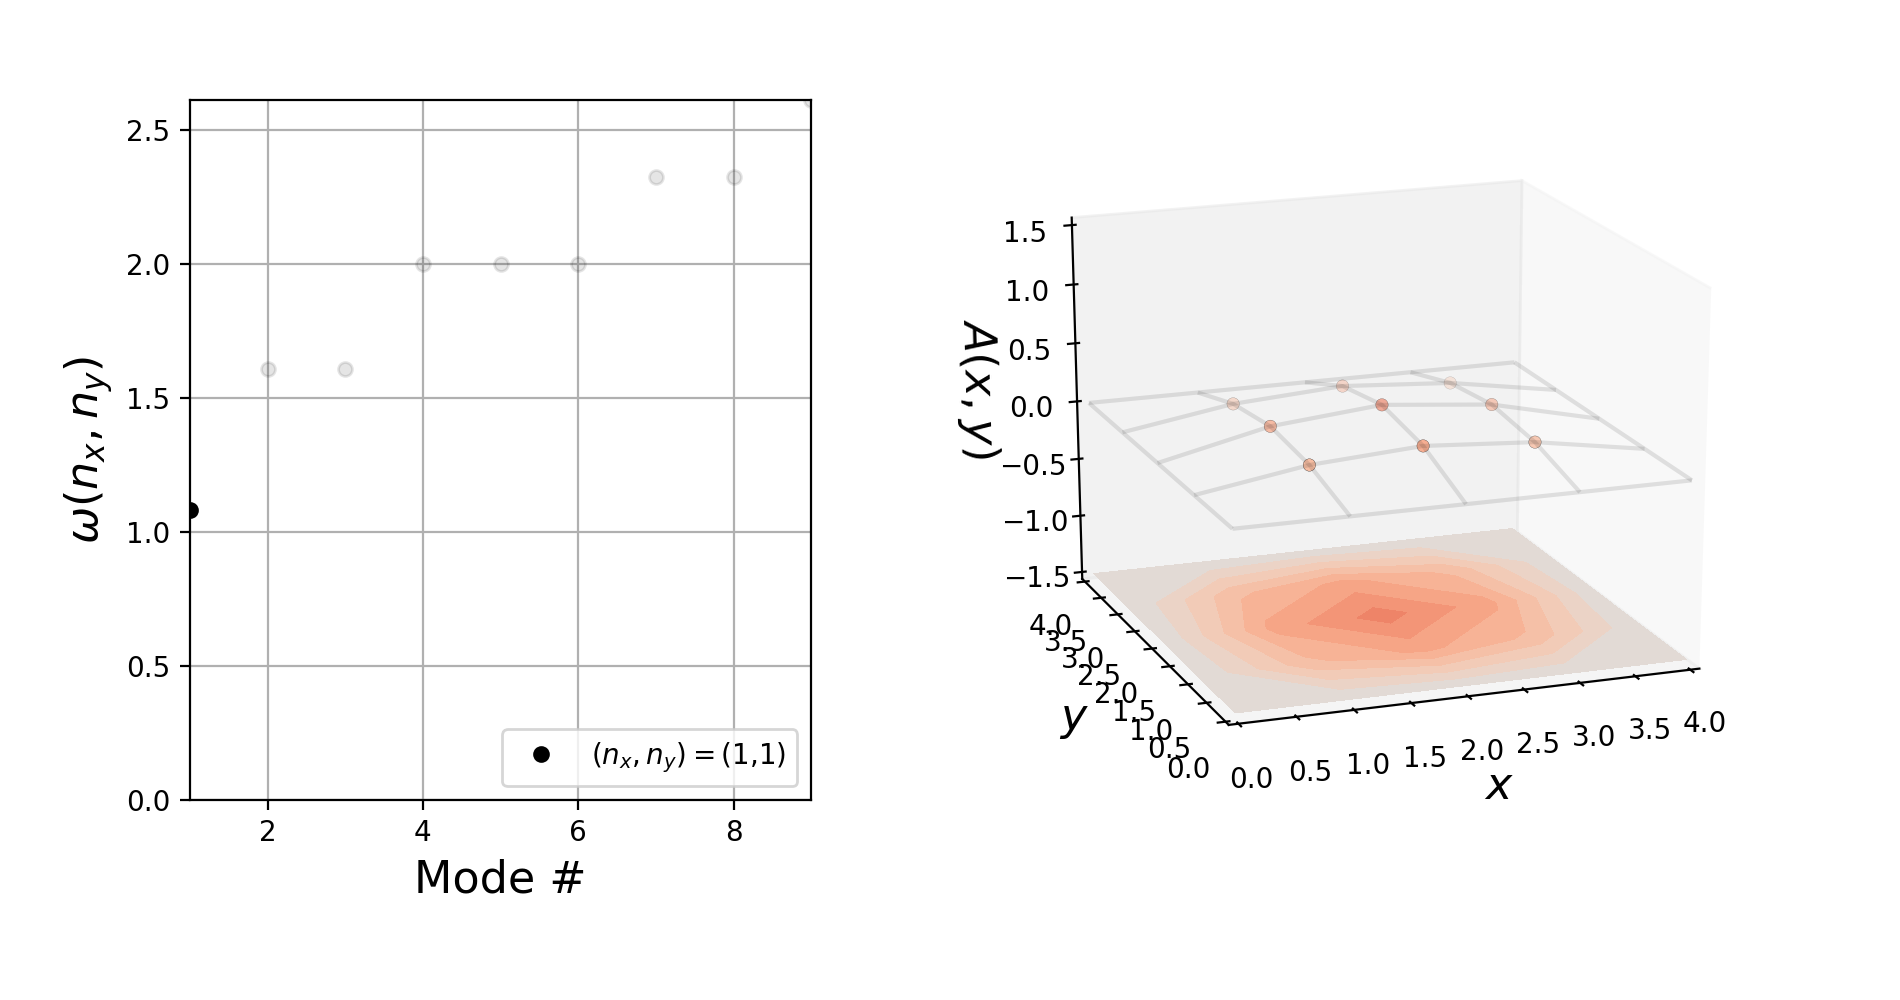

In [11]:
#n_it = np.linspace(1.,20.,20)
om = 1.
TH = 1.
TV = 1.
aH = 2.
aV = 1.
m = 1.
nx_max = 3
ny_max = 3
n_prod = nx_max*ny_max
om_range = [0.,3.5]
ind_val = 0

kx_max = pi/aH
ky_max = pi/aV
kx = np.linspace(0.,kx_max,100)
ky = np.linspace(0.,ky_max,100)
KX,KY = np.meshgrid(kx,ky)

nx_it = np.linspace(1.,float(nx_max),nx_max)
ny_it = np.linspace(1.,float(ny_max),ny_max)
NH = nx_max
NV = ny_max

kx_finite, ky_finite = kvals(nx_it,ny_it,NH,NV,aH,aV)

# #COMMENT OUT
# x_max = NH*aH
# y_max = NV*aV
# x_int = np.linspace(aH,x_max-aH,NH-1)  
# y_int = np.linspace(aV,y_max-aV,NV-1)
# X_int,Y_int = np.meshgrid(x_int,y_int) 

# x_range = np.linspace(0.,(x_max),100)
# y_range = np.linspace(0.,(y_max),100)
# X_range,Y_range = np.meshgrid(x_range,y_range) 


#limit kvals to let then max kx and ky range
kx_finite_trunc = np.array([i for i in kx_finite if i <= max(kx)])
ky_finite_trunc = np.array([i for i in ky_finite if i <= max(ky)])

KX_finite, KY_finite = np.meshgrid(kx_finite_trunc,ky_finite_trunc)
om_finite = omega(KX_finite,KY_finite,TH,TV,aH,aV,m)


kx_finite_flat, ky_finite_flat = KX_finite.flatten(), KY_finite.flatten()
om_finite_flat = om_finite.flatten()
index_sorted = np.argsort(om_finite_flat)
om_sorted = om_finite_flat[index_sorted]
kx_sorted = kx_finite_flat[index_sorted]
ky_sorted = ky_finite_flat[index_sorted]
indices = range(len(om_finite_flat))


# #COMMENT OUT
# #from indices_all, get new indices where the amplitude is nonzero:
# indices = []
# for i in range(len(indices_all)):
#     print(np.sum(np.sin(kx_sorted[i]*X_int)*np.sin(ky_sorted[i]*Y_int)))
#     #if np.sum(np.sin(kx_sorted[i]*X_int)*np.sin(ky_sorted[i]*Y_int)) > 1e-6:
#     #    indices.append(indices_all[i])
#     #    print(i)
# indices = np.array(indices)


om = om_sorted[ind_val]
kx_vals, ky_vals = omega_finite(kx_finite_trunc,ky_finite_trunc,om,TH,TV,aH,aV,m)
#kx_vals, ky_vals = kx_finite_flat[ind_val], ky_finite_flat[ind_val]


fig = plt.figure(figsize=(9.5, 5))
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.9, wspace=1., hspace=0.)
gs = GridSpec(1, 7)


#Define plot1
###############################################
ax1 = fig.add_subplot(gs[0:, 3:], projection='3d')
ax1.view_init(elev=20, azim=250)


#Define plot2
###############################################
ax2 = fig.add_subplot(gs[0, :3])


#Define plot updater
###############################################
###############################################
def update(ind_val,nx_max,ny_max,TH,TV,aH,aV,t):
    ind_val = ind_val-1
    nx_max = nx_max+1
    ny_max = ny_max+1
    
    global n_prod
    n_prod = (nx_max-1)*(ny_max-1)
    
    s0.max = n_prod
    
    if n_prod <= ind_val + 1:
        ind_val = n_prod - 1
        
    nx_it = np.linspace(1.,float(nx_max-1),nx_max-1)
    ny_it = np.linspace(1.,float(ny_max-1),ny_max-1)
    NH = nx_max
    NV = ny_max

    kx_finite, ky_finite = kvals(nx_it,ny_it,NH,NV,aH,aV)
    
    kx_max = pi/aH
    ky_max = pi/aV
    kx = np.linspace(0.,kx_max,100)
    ky = np.linspace(0.,ky_max,100)
    KX,KY = np.meshgrid(kx,ky)    
    
    
    x_max = NH*aH
    y_max = NV*aV
    x_int = np.linspace(aH,x_max-aH,NH-1)  
    y_int = np.linspace(aV,y_max-aV,NV-1)
    X_int,Y_int = np.meshgrid(x_int,y_int) 
    
    x_int_edges = np.linspace(0,x_max,NH+1)  
    y_int_edges = np.linspace(0,y_max,NV+1)
    X_int_edges,Y_int_edges = np.meshgrid(x_int_edges,y_int_edges) 
    
    x_range = np.linspace(0.,(x_max),100)
    y_range = np.linspace(0.,(y_max),100)
    X_range,Y_range = np.meshgrid(x_range,y_range) 


    #limit kvals to max kx and ky range
    kx_finite_trunc = np.array([i for i in kx_finite if i <= max(kx)])
    ky_finite_trunc = np.array([i for i in ky_finite if i <= max(ky)])

    KX_finite, KY_finite = np.meshgrid(kx_finite_trunc,ky_finite_trunc)
    om_finite = omega(KX_finite,KY_finite,TH,TV,aH,aV,m)

    
    kx_finite_flat, ky_finite_flat = KX_finite.flatten(), KY_finite.flatten()
    om_finite_flat = om_finite.flatten()
    index_sorted = np.argsort(om_finite_flat)
    om_sorted = om_finite_flat[index_sorted]
    kx_sorted = kx_finite_flat[index_sorted]
    ky_sorted = ky_finite_flat[index_sorted]
    indices = range(len(om_finite_flat))
    
    kx_ind = kx_sorted[ind_val]
    ky_ind = ky_sorted[ind_val]
    nx_ind = kx_ind*NH*aH/pi
    ny_ind = ky_ind*NV*aV/pi
    
    #get spatial amplitude based on modes
    A_xy_int_edges = spatial_modes(nx_ind,ny_ind,X_int_edges,Y_int_edges,NH,NV,aH,aV)
    A_xy_int = spatial_modes(nx_ind,ny_ind,X_int,Y_int,NH,NV,aH,aV)
    A_xy_surf = spatial_modes(nx_ind,ny_ind,X_range,Y_range,NH,NV,aH,aV)
    
    
    om = om_sorted[ind_val]
    T=2.*pi/om
    s6.max = 2.*pi/om
    s6.step = T/20.
    #kx_vals, ky_vals = kx_finite_flat[ind_val], ky_finite_flat[ind_val]
    
    
    #get kx_vals, ky_vals if om is near allowed om(kx,ky)
    kx_vals, ky_vals = omega_finite(kx_finite_trunc,ky_finite_trunc,om,TH,TV,aH,aV,m)

    
    
    #plot1
    #############################
    ax1.clear()
    #ax1.plot_surface(X_range, Y_range, A_xy_surf, alpha=0.1,cmap=cm.coolwarm)

    ax1.plot_wireframe(X_int_edges, Y_int_edges, np.cos(om*t)*A_xy_int_edges, alpha=0.1, color='k')
    
    ax1.scatter3D(X_int, Y_int, np.cos(om*t)*A_xy_int,
                c=np.cos(om*t)*A_xy_int.flatten(), cmap=cm.coolwarm, vmin=-0.5, vmax=0.5, 
                edgecolors='k', linewidths=0.1, s = 20)
    
    ax1.contourf(X_int_edges, Y_int_edges, np.cos(om*t)*A_xy_int_edges,
                 zdir='z', offset=-1.5, cmap=cm.coolwarm, vmin=-0.5, vmax=0.5,
                 extent=(0,1,0,1))
    
    ax1.set_xlabel('$x$', fontsize=16)
    ax1.set_ylabel('$y$', fontsize=16)
    ax1.set_zlabel('$A(x,y)$', fontsize=16)
    ax1.set_xlim([min(x_range),max(x_range)])
    ax1.set_ylim([min(y_range),max(y_range)])
    ax1.set_zlim([-1.5,1.5])
    ax1.grid(False)
    

    
    #plot2
    #############################     
    ax2.clear()
    ax2.plot(indices+np.ones(len(indices)), om_sorted, 'ko', markersize=5, alpha=0.1)
    ax2.plot(ind_val+1, om, 'ko', markersize=5,
             label='$(n_{x},n_{y})=$' + '(' + str(int(nx_ind)) + ',' + str(int(ny_ind)) + ')' )
    
    ax2.set_xlim([1,n_prod])
    ax2.set_ylim([0,om_sorted[-1]])
    ax2.set_xlabel('Mode #', fontsize=16)
    ax2.set_ylabel('$\omega(n_{x},n_{y})$', fontsize=16)
    ax2.legend(loc=4)
    ax2.grid(True)
    
    fig.canvas.draw_idle()
    return
                  


#Define control elements
###############################################
###############################################
s0=widgets.IntSlider(
    min=1,
    max=100,
    step=1,
    value=0,
    layout=Layout(width='500px'),
    description='Mode #',
    style = {'description_width': 'initial'})

s0_1=widgets.IntSlider(
    min=1,
    max=10,
    step=1,
    value=3,
    layout=Layout(width='500px'),
    description='$nx$',
    style = {'description_width': 'initial'})

s0_2=widgets.IntSlider(
    min=1,
    max=10,
    step=1,
    value=3,
    layout=Layout(width='500px'),
    description='$ny$',
    style = {'description_width': 'initial'})

# s1=widgets.FloatSlider(
#     min=0.,
#     max=3.,
#     step=0.01,
#     value=1.,
#     layout=Layout(width='500px'),
#     description='$\omega$',
#     style = {'description_width': 'initial'})

s2=widgets.FloatSlider(
    min=0.,
    max=10.,
    step=0.01,
    value=1.,
    layout=Layout(width='500px'),
    description='$T_{H}$',
    style = {'description_width': 'initial'})

s3=widgets.FloatSlider(
    min=0.,
    max=10.,
    step=0.01,
    value=1.,
    layout=Layout(width='500px'),
    description='$T_{V}$',
    style = {'description_width': 'initial'})

s4=widgets.FloatSlider(
    min=0.,
    max=10.,
    step=0.01,
    value=1.,
    layout=Layout(width='500px'),
    description='$a_{H}$',
    style = {'description_width': 'initial'})

s5=widgets.FloatSlider(
    min=0.,
    max=10.,
    step=0.01,
    value=1.,
    layout=Layout(width='500px'),
    description='$a_{V}$',
    style = {'description_width': 'initial'})

s6=widgets.FloatSlider(
    min=0,
    max=100,
    step=0.1,
    value=0,
    layout=Layout(width='500px'),
    description='t',
    style = {'description_width': 'initial'})




#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'ind_val': s0, 'nx_max': s0_1, 'ny_max': s0_2, 'TH': s2, 'TV': s3, 'aH': s4, 'aV':s5, 't':s6})
 #'ind_val': s0,
                                  
#Set layout
###############################################
###############################################
box_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
display(VBox([s0,s0_1,s0_2,s2,s3,s4,s5,s6],layout=box_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3">These plots show the normal modes of a finite 2D system of coupled masses on strings, constrained by fixed boundaries. Note, we assume that the separation of the masses is large compared to their amplitude, but the amplitude in the plot above is "stretched" vertically to better visualize the result.
</font>


<br/>
<font size="3">
<b>Plot 1 (left):</b>
<ul>
    <li>normal mode frequency, $\omega(n_{x},n_{y})$, is plotted as function of the mode number</li>
    <li>all possible modes are shown as grey dots, and a particular mode is highlighted as a large black dot</li>
    <li>the legend displays the mode that is highlighted</li>
</ul>
    
    
<br/>
<b>Plot 2 (right):</b>
<ul>
    <li>the spatial distribution of masses and strings is shown for a given normal mode (amplitude not shown to scale)</li>
    <li>The amplitude intensity is projected at the bottom of the plot, where the colorscale represents the amplitude of the masses (red = positive, blue = negative)</li>
    <li>The mode depicted in Plot 2 corresponds to the mode highlighted in Plot 1</li>
</ul>
  
  
<br/>
<b>Sliders:</b>
<ul>
    <li>Mode #: choose the index of the mode that will be displayed</li>
    <li>$n_x$: vary the total number of masses along the x-direction</li>
    <li>$n_y$: vary the total number of masses along the y-direction</li>
    <li>$T_H$: vary the string tension in the horizontal direction</li>
    <li>$T_V$: vary the string tension in the vertical direction</li>
    <li>$a_H$: vary the separation of the masses in the horizontal direction</li>
    <li>$a_V$: vary the separation of the masses in the vertical direction</li>
    <li>$t$: vary the time within the range $[0,T]$, where $T=\frac{2\pi}{\omega(n)}$ is the period of mode $n$ </li>
</ul>
</font>
<br/>

<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>How do the normal mode frequencies change when you vary $T$ and $a$?</li>
    <li>How does the total number of normal modes depend on the number of masses in either direction, $n_x$ and $n_{y}$?</li>
    <li>What does the LOWEST normal mode of the system look like when you vary the total number of masses?</li>
    <li>What does the HIGHEST normal mode of the system look like when you vary the total number of masses?</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [12]:
#The code in this block includes content from StackOverFlow User: harshil (CC BY-SA 4.0)
#and can be found here: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
###############################################
###############################################
#Enable hidden code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
